<a href="https://colab.research.google.com/github/SohaHussain/Generative-Deep-Learning/blob/main/01_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multilayer Perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset.

 [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) is a collection of 60,000 32 × 32 pixel color images that comes bundled with Keras out of the box. Each image is classified into exactly one of 10 classes.


###Preprocessing the dataset

By default, the image data consists of integers between 0 and 255 for each pixel chan‐ nel. We first need to preprocess the images by scaling these values to lie between 0 and 1, as neural networks work best when the absolute value of each input is less than 1.

We also need to change the integer labeling of the images to one-hot encoded vectors, because the neural network output will be a probability that the image belongs to each class. If the class integer label of an image is i, then its one-hot encoding is a vector of length 10 (the number of classes) that has 0s in all but the ith element, which is 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

In [ ]:
# parameters
NUM_CLASSES = 10

In [ ]:
# prepare the data

# Load the CIFAR-10 dataset. x_train and x_test are numpy arrays of shape [50000, 32, 32, 3] and [10000, 32, 32, 3], respectively.
# y_train and y_test are numpy arrays of shape [50000, 1] and [10000, 1], respectively, con‐ taining the integer labels in the range 0 to 9 for the class of each image.

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
# Scale each image so that the pixel channel values lie between 0 and 1.

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
# One-hot encode the labels—the new shapes of y_train and y_test are [50000,10] and [10000, 10], respectively.

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

The training image data (x_train) is stored in a tensor of shape [50000, 32, 32, 3]. There are no columns or rows in this dataset; instead, this is a tensor with four dimensions. A tensor is just a multidimensional array—it is the nat‐ ural extension of a matrix to more than two dimensions. The first dimension of this tensor references the index of the image in the dataset, the second and third relate to the size of the image, and the last is the channel (i.e., red, green, or blue, since these are RGB images).

In [ ]:
print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
x_train[54, 12, 13, 1]

0.36862746

### Building the model

To build our MLP, we used three different types of layers: Input, Flatten, and Dense.

**Input Layer**

The Input layer is an entry point into the network. We tell the network the shape of each data element to expect as a tuple. Notice that we do not specify the batch size; this isn’t necessary as we can pass any number of images into the Input layer simultaneously. We do not need to explicitly state the batch size in the Input layer definition.

**Flatten Layer**

Next we flatten this input into a vector, using a Flatten layer. This results in a vector of length 3,072 (= 32 × 32 × 3). The reason we do this is because the subsequent Dense layer requires that its input is flat, rather than a multidimensional array. As we shall see later, other layer types require multidimensional arrays as input, so you need to be aware of the required input and output shape of each layer type to understand when it is necessary to use Flatten.

**Dense Layer**

The Dense layer is one of the most fundamental building blocks of a neural network. It contains a given number of units that are densely connected to the previous layer— that is, every unit in the layer is connected to every unit in the previous layer, through a single connection that carries a weight (which can be positive or negative). The output from a given unit is the weighted sum of the inputs it receives from the previous layer, which is then passed through a nonlinear activation function before being sent to the following layer.

In [ ]:
# Building our MLP using the functional API

input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


It’s important to remember that by default, each unit within a given layer is also connected to one additional bias unit that always outputs 1. This ensures that the output from the unit can still be nonzero even when all inputs from the previous layer are 0.
Therefore, the number of parameters in the 200-unit Dense layer is 200 * (3,072 + 1) = 614,600.

###Compiling the model

**Loss functions**

The loss function is used by the neural network to compare its predicted output to the ground truth. It returns a single number for each observation; the greater this number, the worse the network has performed for this observation.

For regression problem  - MSE

For classification - Categorical Cross-entropy

For binary classification - Binary Cross-entropy

**Optimizers**

The optimizer is the algorithm that will be used to update the weights in the neural network based on the gradient of the loss function.

One of the most commonly used and stable optimizers is Adam (Adaptive Moment Estimation).3 In most cases, you shouldn’t need to tweak the default parameters of the Adam optimizer, except the learning rate. The greater the learning rate, the larger the change in weights at each training step. While training is initially faster with a large learning rate, the downside is that it may result in less stable training and may not find the global minimum of the loss function. This is a parameter that you may want to tune or adjust during training.

In [ ]:
# we compile the model with an optimizer and a loss function

opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

###Training the model



*   x_train - the raw image data
* y_train - one-hot encoded class labels
* batch_size - determines how many observations will be passed to the network at each training step
* epochs - determine how many times the network will be shown the full training data
* shuffle = True - the batches will be drawn randomly without replacement from the training data at each training step


The training process works as follows:

First, the weights of the network are initialized to small random values. Then the network performs a series of training steps. At each training step, one batch of images is passed through the network and the errors are backpropagated to update the weights. The batch_size determines how many images are in each training step batch. The larger the batch size, the more stable the gradient calculation, but the slower each training step.

It would be far too time-consuming and computationally intensive to use the entire dataset to calculate the gradient at each training step, so generally a batch size between 32 and 256 is used. It is also now recommended practice to increase the batch size as training progresses.

This continues until all observations in the dataset have been seen once. This completes the first epoch. The data is then passed through the network again in batches as part of the second epoch. This process repeats until the specified number of epochs have elapsed.

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8534 - accuracy: 0.3356
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6698 - accuracy: 0.4048
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5885 - accuracy: 0.4339
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5314 - accuracy: 0.4559
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4953 - accuracy: 0.4690
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4614 - accuracy: 0.4794
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4393 - accuracy: 0.4894
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4099 - accuracy: 0.4995
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3891 - accuracy: 0.5074
Epoch 10/10
1563/1563 [==============================] - 16s 10m

###Evaluating the model

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4318 - accuracy: 0.4932


[1.4318434000015259, 0.49320000410079956]

The output is a list of the metrics we are monitoring: categorical cross-entropy and accuracy. We can see that model accuracy is still 49.0% even on images that it has never seen before. Note that if the model were guessing randomly, it would achieve approximately 10% accuracy (because there are 10 classes), so 49.0% is a good result, given that we have used a very basic neural network.

In [ ]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 4ms/step


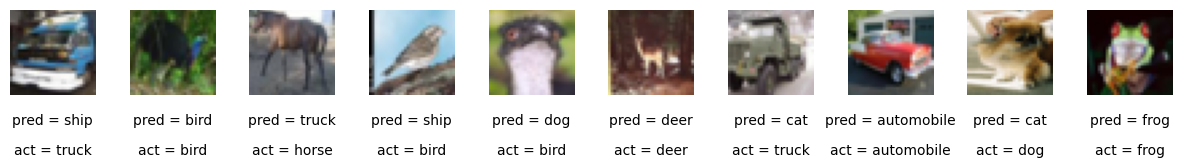

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)